In [56]:
#Grupo:
#Pedro Sousa
#Pedro Silva
#Rodolfo Diogo
#Dilan Vera Cruz

#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [57]:
#Import the data
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
#eliminar Cabin por ter + de 20%, name e ticket por não ser importante para a analise
df.drop(columns=['Name','Cabin','Ticket'], inplace = True)

In [89]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_size
count,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,449.652677,0.410999,2.259045,28.530637,0.525326,0.437048,34.416377,1.962373
std,259.383546,0.492371,0.829380,13.181406,0.940480,0.852967,52.895607,1.491532
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,222.500000,0.000000,2.000000,20.000000,0.000000,0.000000,8.050000,1.000000
50%,444.000000,0.000000,3.000000,28.000000,0.000000,0.000000,15.500000,1.000000
75%,681.000000,1.000000,3.000000,36.000000,1.000000,1.000000,31.943750,2.000000
max,891.000000,1.000000,3.000000,60.000000,5.000000,6.000000,512.329200,8.000000


In [60]:
#Check data types and some more info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


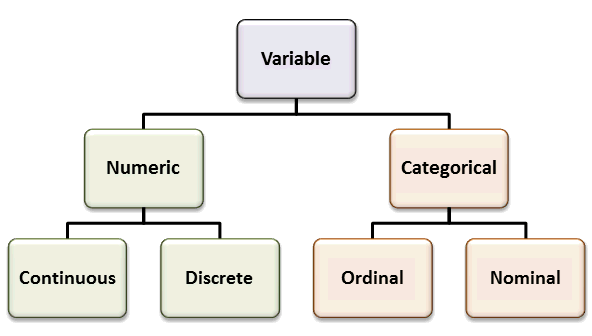

- **Categorical Nominal**: Department, Name
- **Categorical Ordinal**: Job Title
- **Numeric Continous**: Salary, N_People_Team, N_Managers, ID_Employee
- **Numeric Discrete**: 

In [61]:
#Let's look for non-existing values!
df.isnull().sum()



PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

Avg of Age:  29.69911764705882
Median Age:  28.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


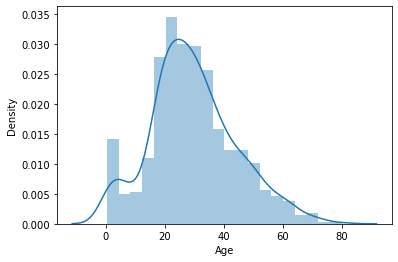

In [36]:
#Clean non-existing values for salary

#Be careful, you can't get an histogram if you have missing values (NA)
ax = sns.distplot(df['Age'].dropna())
print ("Avg of Age: ",df['Age'].mean())
print ("Median Age: ",df['Age'].median())

We can see in the chart that the distribution has a tail. Since it doesn't follow a normal distribution, the tail can pull the mean to the right, so we might want to use the Median instead,to fill the Na values.

In [62]:
#eliminar filas com nulo na 'Age'
df.dropna(subset=['Age'], inplace = True)

df.dropna(subset=['Embarked'], inplace = True)

In [63]:
#ver nr de pessoas com + de 60 anos
print(df)

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0              1         0       3    male  22.0      1      0   7.2500   
1              2         1       1  female  38.0      1      0  71.2833   
2              3         1       3  female  26.0      0      0   7.9250   
3              4         1       1  female  35.0      1      0  53.1000   
4              5         0       3    male  35.0      0      0   8.0500   
..           ...       ...     ...     ...   ...    ...    ...      ...   
885          886         0       3  female  39.0      0      5  29.1250   
886          887         0       2    male  27.0      0      0  13.0000   
887          888         1       1  female  19.0      0      0  30.0000   
889          890         1       1    male  26.0      0      0  30.0000   
890          891         0       3    male  32.0      0      0   7.7500   

    Embarked  
0          S  
1          C  
2          S  
3          S  
4          S  
..       

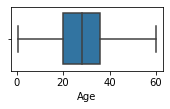

In [67]:
#See if we have to clean outliers

fig = plt.figure()

ax1 = fig.add_subplot(321)
sns.boxplot(x=df['Age'])
'''
ax2 =fig.add_subplot(322)
sns.boxplot(x=df["N_People_Team"])

ax3= fig.add_subplot(325)
sns.boxplot(x=df["N_Managers"])
'''

plt.show()

In [66]:
df = df[df['Age'] <= 60]
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
885,886,0,3,female,39.0,0,5,29.1250,Q
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [68]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [70]:
print(df[df['Age'] < 10])

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
7              8         0       3    male  2.00      3      1  21.0750   
10            11         1       3  female  4.00      1      1  16.7000   
16            17         0       3    male  2.00      4      1  29.1250   
24            25         0       3  female  8.00      3      1  21.0750   
43            44         1       2  female  3.00      1      2  41.5792   
..           ...       ...     ...     ...   ...    ...    ...      ...   
827          828         1       2    male  1.00      0      2  37.0042   
831          832         1       2    male  0.83      1      1  18.7500   
850          851         0       3    male  4.00      4      2  31.2750   
852          853         0       3  female  9.00      1      1  15.2458   
869          870         1       3    male  4.00      1      1  11.1333   

    Embarked  
7          S  
10         S  
16         Q  
24         S  
43         C  
..       

Employee_ID        0
Name               0
Sex                0
Title              0
Department         0
Salary             0
N_People_Team      0
N_Managers         0
City               0
Renews_Contract    0
dtype: int64

In [83]:
#Let's create a new variable: Tamanho_Equipa (Feature Engineering) by using both N_Pessoas_Equipa and N_Gestores_Projeto
#This variable will portrait the number of family members a passenger had in the boat, including self

df['Family_size'] = df['SibSp'] + df['Parch'] + 1
df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size
0,1,0,3,male,22.0,1,0,7.2500,S,2
1,2,1,1,female,38.0,1,0,71.2833,C,2
2,3,1,3,female,26.0,0,0,7.9250,S,1
3,4,1,1,female,35.0,1,0,53.1000,S,2
4,5,0,3,male,35.0,0,0,8.0500,S,1


C:\Users\luism\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\luism\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


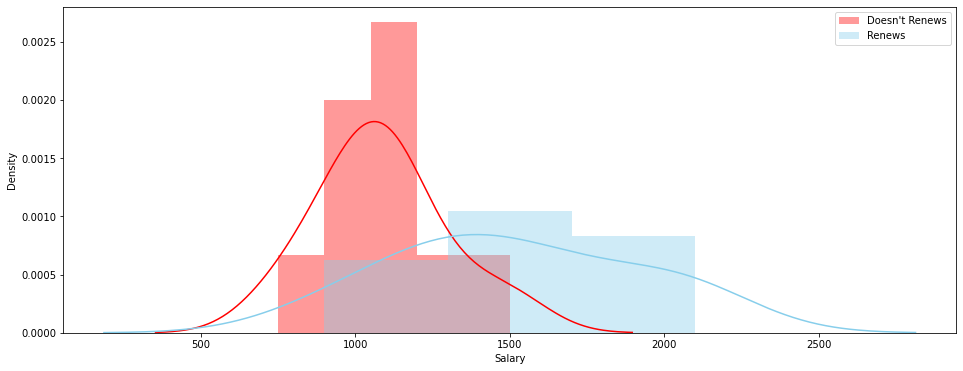

In [18]:
'''#Time to do some data visualization
plt.figure(figsize=(16, 6))
sns.distplot( df[df.Renews_Contract == 0]["Salary"], color="red", label="Doesn't Renews")
sns.distplot( df[df.Renews_Contract == 1]["Salary"], color="skyblue", label="Renews")
plt.legend()'''

,Sex,Renews_Contract
0,F,0.500000
1,M,0.583333


In [103]:
df_encoded = pd.get_dummies(df, columns=["Sex","Embarked"], prefix=["Sex","Embarked_type"])


In [104]:


df_encoded.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_size,Group_Age,Group_Fare,Sex_female,Sex_male,Embarked_type_C,Embarked_type_Q,Embarked_type_S
0,1,0,3,22.0,1,0,7.2500,2,2,1,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,2,4,4,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,2,1,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,2,3,4,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,3,1,0,1,0,0,1


In [106]:
def AgeDiscretization (row):
    if row['Age'] <= 10:
        return 0
    elif row['Age'] > 10 and row['Age'] <= 20:
        return 1
    elif row['Age'] > 20 and row['Age'] <= 28:
        return 2
    elif row['Age'] > 28 and row['Age'] <= 36:
        return 3
    elif row['Age'] > 36:
        return 4
    
df_encoded['Group_Age'] = df.apply(AgeDiscretization, axis = 1)

def FareDiscretization (row):
    if row['Fare'] == 0:
        return 0
    elif row['Fare'] > 0 and row['Fare'] <= 8.05:
        return 1
    elif row['Fare'] > 8.05 and row['Fare'] <= 15.5:
        return 2
    elif row['Fare'] > 15.5 and row['Fare'] <= 31.943750:
        return 3
    elif row['Fare'] > 31.943750:
        return 4
    
df_encoded['Group_Fare'] = df.apply(FareDiscretization, axis = 1)

df_encoded


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_size,Group_Age,Group_Fare,Sex_female,Sex_male,Embarked_type_C,Embarked_type_Q,Embarked_type_S
0,1,0,3,22.0,1,0,7.2500,2,2,1,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,2,4,4,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,2,1,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,2,3,4,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,3,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,39.0,0,5,29.1250,6,4,3,1,0,0,1,0
886,887,0,2,27.0,0,0,13.0000,1,2,2,0,1,0,0,1
887,888,1,1,19.0,0,0,30.0000,1,1,3,1,0,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,2,3,0,1,1,0,0


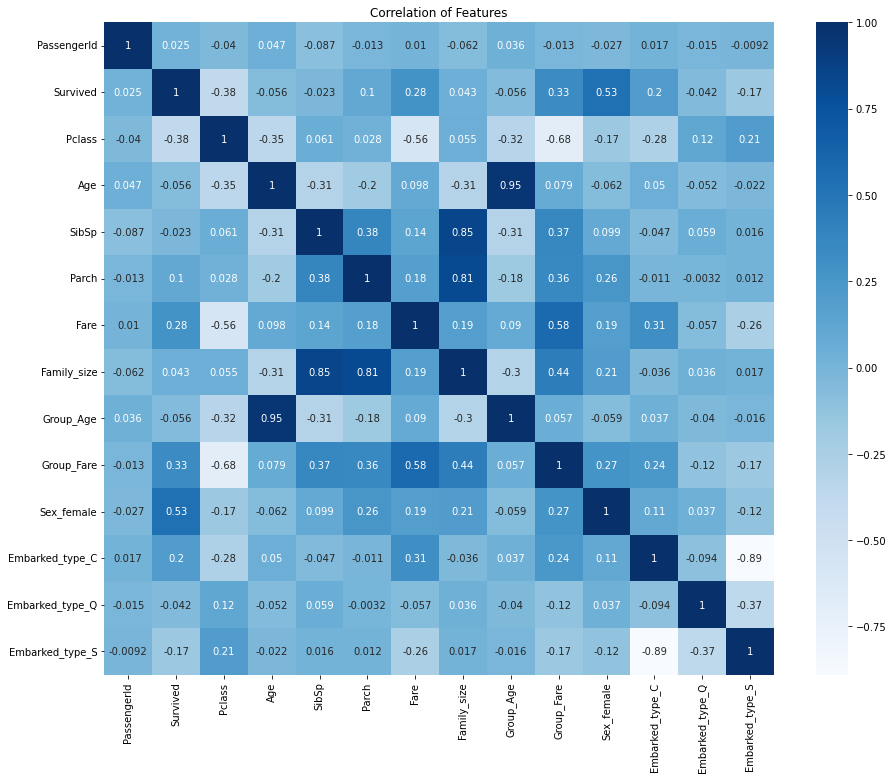

In [112]:
#Let's get a correlation heatmap

plt.figure(figsize=(15,12))
plt.title('Correlation of Features')
sns.heatmap(df_encoded.corr(),vmax=1.0,  annot=True, cmap="Blues")
plt.show()

In [113]:
df_encoded = df_encoded.drop(['PassengerId',], axis=1)

In [114]:
df_encoded.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_size,Group_Age,Group_Fare,Sex_female,Embarked_type_C,Embarked_type_Q,Embarked_type_S
0,0,3,22.0,1,0,7.2500,2,2,1,0,0,0,1
1,1,1,38.0,1,0,71.2833,2,4,4,1,1,0,0
2,1,3,26.0,0,0,7.9250,1,2,1,1,0,0,1
3,1,1,35.0,1,0,53.1000,2,3,4,1,0,0,1
4,0,3,35.0,0,0,8.0500,1,3,1,0,0,0,1


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_size,Group_Age,Group_Fare,Sex_female,Sex_male,Embarked_type_C,Embarked_type_Q,Embarked_type_S
0,1,0,3,22.0,1,0,7.2500,2,2,1,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,2,4,4,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,2,1,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,2,3,4,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,3,1,0,1,0,0,1


In [121]:
#Let's split the data!
x = df_encoded.drop(columns=['Survived'])
y = df_encoded['Survived'] # define the target variable (dependent variable) as y


X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state = 50)
print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)

(552, 12) (552,)
(139, 12) (139,)


In [122]:
Y_train

131    0
258    1
208    1
6      0
874    1
      ..
172    1
374    0
143    0
631    0
887    1
Name: Survived, Length: 552, dtype: int64

In [123]:
X_test

,Pclass,Age,SibSp,Parch,Fare,Family_size,Group_Age,Group_Fare,Sex_female,Embarked_type_C,Embarked_type_Q,Embarked_type_S
530,2,2.0,1,1,26.0000,3,0,3,1,0,0,1
18,3,31.0,1,0,18.0000,2,3,3,1,0,0,1
797,3,31.0,0,0,8.6833,1,3,2,1,0,0,1
844,3,17.0,0,0,8.6625,1,1,2,0,0,0,1
645,1,48.0,1,0,76.7292,2,4,4,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
342,2,28.0,0,0,13.0000,1,2,2,0,0,0,1
838,3,32.0,0,0,56.4958,1,3,4,0,0,0,1
883,2,28.0,0,0,10.5000,1,2,2,0,0,0,1
772,2,57.0,0,0,10.5000,1,4,2,1,0,0,1


In [128]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [127]:
Y_pred

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [125]:
Y_test

530    1
18     0
797    1
844    0
645    1
      ..
342    0
838    1
883    0
772    0
344    0
Name: Survived, Length: 139, dtype: int64

In [126]:
acc = accuracy_score(Y_test, Y_pred)
acc

0.7769784172661871

In [131]:
Y_pred

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [130]:
Y_test

530    1
18     0
797    1
844    0
645    1
      ..
342    0
838    1
883    0
772    0
344    0
Name: Survived, Length: 139, dtype: int64

In [132]:
acc = accuracy_score(Y_test, Y_pred)
acc

0.7769784172661871

In [133]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
acc

0.6330935251798561

In [140]:
# K Nearest Neighbours
for a in range(0,99,2):
    knn = KNeighborsClassifier(n_neighbors = a+1)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    acc = accuracy_score(Y_test, Y_pred)
    print(acc)

0.6618705035971223
0.7410071942446043
0.7194244604316546
0.7194244604316546
0.6762589928057554
0.6690647482014388
0.6618705035971223
0.6618705035971223
0.6618705035971223
0.6546762589928058
0.6618705035971223
0.6690647482014388
0.6618705035971223
0.6618705035971223
0.6618705035971223
0.6690647482014388
0.6546762589928058
0.6474820143884892
0.6330935251798561
0.6474820143884892
0.6618705035971223
0.6474820143884892
0.6402877697841727
0.6762589928057554
0.6762589928057554
0.6618705035971223
0.6690647482014388
0.6546762589928058
0.6546762589928058
0.6546762589928058
0.6474820143884892
0.6474820143884892
0.6402877697841727
0.6330935251798561
0.6618705035971223
0.6546762589928058
0.6546762589928058
0.6618705035971223
0.6546762589928058
0.6474820143884892
0.6330935251798561
0.6258992805755396
0.6115107913669064
0.6187050359712231
0.6187050359712231
0.6474820143884892
0.6402877697841727
0.6474820143884892
0.6330935251798561
0.6330935251798561


In [142]:
# O k = 3 tem maior Accuracy
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
acc

0.7410071942446043

In [48]:
Y_pred

array([0, 1, 1, 0, 0], dtype=int64)

In [34]:
Y_test

21    1
2     0
19    1
22    1
23    1
25    1
11    0
Name: Renews_Contract, dtype: int64

In [137]:
# Random Forests

random_forest = RandomForestClassifier(n_estimators=8)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
acc

0.7553956834532374

In [144]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_size,Group_Age,Group_Fare
count,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,449.652677,0.410999,2.259045,28.530637,0.525326,0.437048,34.416377,1.962373,2.373372,2.467438
std,259.383546,0.492371,0.829380,13.181406,0.940480,0.852967,52.895607,1.491532,1.273856,1.154711
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.000000,0.000000,0.000000,8.050000,1.000000,1.000000,1.000000
50%,444.000000,0.000000,3.000000,28.000000,0.000000,0.000000,15.500000,1.000000,2.000000,2.000000
75%,681.000000,1.000000,3.000000,36.000000,1.000000,1.000000,31.943750,2.000000,3.000000,3.500000
max,891.000000,1.000000,3.000000,60.000000,5.000000,6.000000,512.329200,8.000000,4.000000,4.000000


In [148]:
df.to_csv('Titanic_v1.csv')